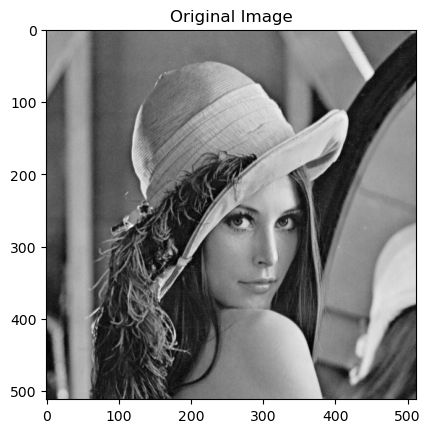

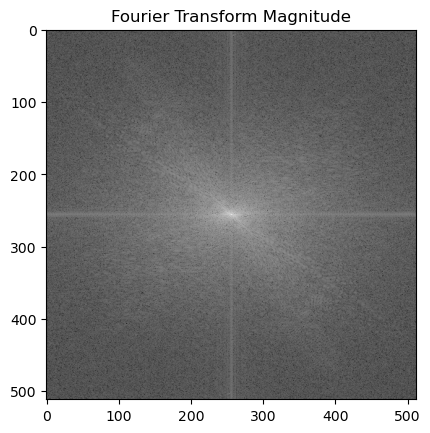

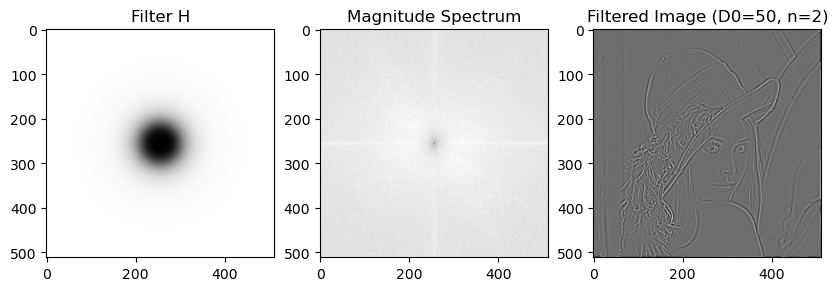

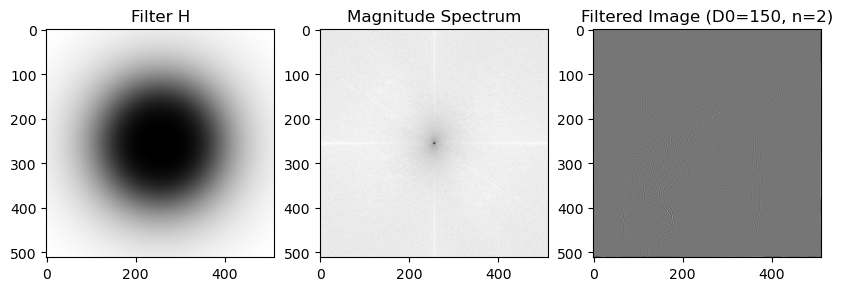

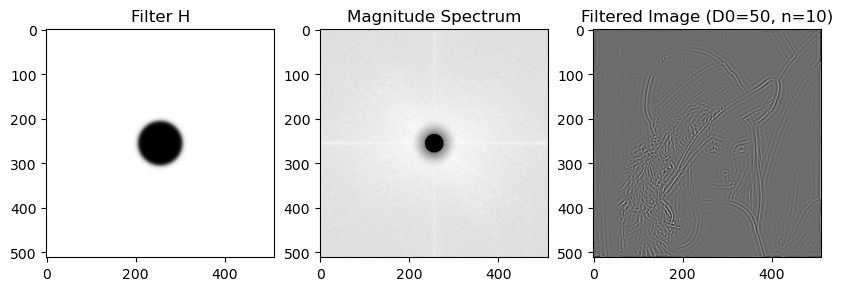

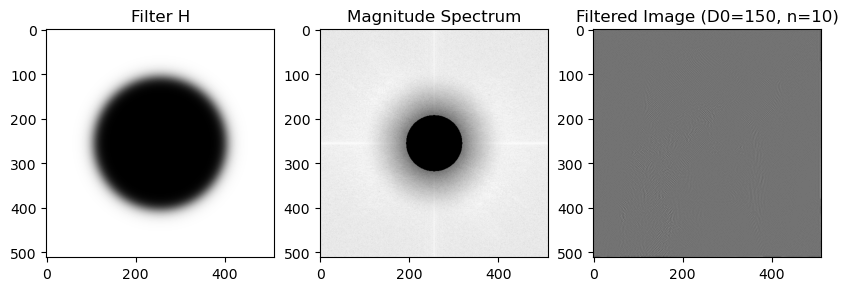

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def butterworthHighpassFilter(img, D0, n):
    img_fft = np.fft.fft2(img)
    img_fft_shift = np.fft.fftshift(img_fft)

    # Construct the Butterworth lowpass filter
    rows, cols = img.shape
    center = (rows/2, cols/2)
    H_lowpass = np.zeros(img.shape, dtype=np.float32)
    for i in range(rows):
        for j in range(cols):
            dist = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            H_lowpass[i,j] = 1 / (1 + (dist/D0)**(2*n))

    # Apply the lowpass filter in the frequency domain
    img_fft_shift_lowpass = img_fft_shift * H_lowpass
    img_lowpass = np.fft.ifft2(np.fft.ifftshift(img_fft_shift_lowpass)).real

    # Construct the Butterworth highpass filter
    H_highpass = 1 - H_lowpass

    # Apply the highpass filter in the frequency domain
    img_fft_shift_highpass = img_fft_shift * H_highpass
    img_highpass = np.fft.ifft2(np.fft.ifftshift(img_fft_shift_highpass)).real

    return img_highpass


# Load the image
img = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

F = np.fft.fft2(img)
F_magnitude = np.abs(np.fft.fftshift(F))
plt.imshow(np.log(1 + F_magnitude), cmap='gray')
plt.title('Fourier Transform Magnitude')
plt.show() 
# Define the parameter values to test
n_values = [2, 10]
D0_values = [50, 150]

# Loop over the parameter values and apply the filter
for n in n_values:
    for D0 in D0_values:
        # Apply the Butterworth high pass filter
        filtered_img = butterworthHighpassFilter(img, D0, n)

        # Compute the magnitude spectrum of the filtered image
        spectrum = np.fft.fftshift(np.fft.fft2(filtered_img))
        magnitude_spectrum = 20 * np.log(np.abs(spectrum) + 1e-10)

        # Plot the filter, magnitude spectrum, and filtered image
        plt.figure(figsize=(10, 10))
        plt.subplot(1, 3, 1)
        H = 1 / (1 + (D0 / (np.sqrt((np.arange(img.shape[0])[:, np.newaxis] - img.shape[0]//2)**2 + (np.arange(img.shape[1])[np.newaxis,:] - img.shape[1]//2)**2) + 1e-10))**(2*n))
        plt.imshow(H, cmap='gray')
        plt.title('Filter H')
        plt.subplot(1, 3, 2)
        plt.imshow(magnitude_spectrum, cmap='gray')
        plt.title('Magnitude Spectrum')
        plt.subplot(1, 3, 3)
        plt.imshow(filtered_img, cmap='gray')
        plt.title(f'Filtered Image (D0={D0}, n={n})')
        plt.show()